In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime, timedelta
from fastai.tabular import add_datepart

### Loading datasets, feature engineering

In [2]:
print('These are the datasets available: \n', os.listdir('flow data/flow data'))
#Note: the usgs_data.csv is just the table from usgs_san_francisquito.txt

These are the datasets available: 
 ['usgs_san_francisquito.txt', 'usgs_data.csv', 'influent_flow.csv', 'weather.csv']


In [3]:
#Looking at influent_flow.csv table, the table containing our target
flow = pd.read_csv('flow data/flow data/influent_flow.csv')
print('Rows: ', flow.shape[0], '\nColumns: ', flow.shape[1])
print(flow.info())

#Change the date column to a datetime type
flow['Date'] = pd.to_datetime(flow['Date'])

flow.head()

Rows:  34516 
Columns:  2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34516 entries, 0 to 34515
Data columns (total 2 columns):
Date        34516 non-null object
INF_FLOW    34516 non-null float64
dtypes: float64(1), object(1)
memory usage: 539.4+ KB
None


,Date,INF_FLOW
0,2013-01-15 00:00:00,9.589273
1,2013-01-15 01:00:00,9.272833
2,2013-01-15 02:00:00,8.861329
3,2013-01-15 03:00:00,9.193454
4,2013-01-15 04:00:00,9.129482


In [89]:
#Looking at weather table
weather = pd.read_csv('flow data/flow data/weather.csv')
print('Rows: ', weather.shape[0], '\nColumns: ', weather.shape[1])
print(weather.info())

#Change the date column to a datetime type
weather['Date'] = pd.to_datetime(weather['Date'])

weather.head()

Rows:  44784 
Columns:  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44784 entries, 0 to 44783
Data columns (total 8 columns):
Date               44784 non-null object
rain               44784 non-null float64
snow               44784 non-null float64
accum              44784 non-null float64
temp               44784 non-null float64
humidity           44784 non-null float64
cloud              44784 non-null float64
app_temperature    44784 non-null float64
dtypes: float64(7), object(1)
memory usage: 2.7+ MB
None


,Date,rain,snow,accum,temp,humidity,cloud,app_temperature
0,2012-12-15 08:00:00,0.0,0.0,0.0,5.95,0.89,0.08,5.95
1,2012-12-15 09:00:00,0.0,0.0,0.0,5.66,0.92,0.09,5.66
2,2012-12-15 10:00:00,0.0,0.0,0.0,5.46,0.91,0.09,5.46
3,2012-12-15 11:00:00,0.0,0.0,0.0,4.82,0.92,0.06,4.82
4,2012-12-15 12:00:00,0.0,0.0,0.0,4.61,0.93,0.03,4.61


In [5]:
#Looking at usgs_san_francisuito.txt table
usgs = pd.read_csv('flow data/flow data/usgs_data.csv', sep = '\t', low_memory = False)
print('Rows: ', usgs.shape[0], '\nColumns: ',usgs.shape[1])
print(usgs.info()) #Looks like we have some missing values in the last 4 columns

#get rid of row 0 (indicating datatype and length for each column)
usgs.drop(0, inplace= True)

#Change the date column to a datetime for this table as well
usgs['datetime'] = pd.to_datetime(usgs['datetime'])

#The original usgs text file indicates the 14747_00060 and 14748_0065 columns 
#indicate discharge and gage height. Lets change the name of those columns
#and their corresponding qualification codes. Let's also rename the 'datetime'
#to 'Date' to be consitent with the other tables

usgs.rename(columns = {'14747_00060': 'discharge', 
            '14747_00060_cd': 'discharge_cd',
            '14748_00065' : 'gage_height',
            '14748_00065_cd' : 'gage_height_cd',
            'datetime' : 'Date'},
           inplace = True)

usgs.head()

Rows:  178896 
Columns:  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178896 entries, 0 to 178895
Data columns (total 8 columns):
agency_cd         178896 non-null object
site_no           178896 non-null object
datetime          178896 non-null object
tz_cd             178896 non-null object
14747_00060       178676 non-null object
14747_00060_cd    178676 non-null object
14748_00065       178761 non-null object
14748_00065_cd    178761 non-null object
dtypes: object(8)
memory usage: 10.9+ MB
None


,agency_cd,site_no,Date,tz_cd,discharge,discharge_cd,gage_height,gage_height_cd
1,USGS,11164500,2013-01-01 00:00:00,PST,44.1,A,1.27,A
2,USGS,11164500,2013-01-01 00:15:00,PST,44.1,A,1.27,A
3,USGS,11164500,2013-01-01 00:30:00,PST,44.1,A,1.27,A
4,USGS,11164500,2013-01-01 00:45:00,PST,43.2,A,1.26,A
5,USGS,11164500,2013-01-01 01:00:00,PST,43.2,A,1.26,A


In [6]:
#Looks these measurements are taken every 15 minutes while the flow is measured every hour

In [7]:
#Now that the 3 dataframes have been cleaned up a bit lets merge them together by date
df = flow.merge(weather, on = 'Date')
df = df.merge(usgs, on = 'Date')
df.set_index('Date', inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34324 entries, 2013-01-15 00:00:00 to 2016-12-22 14:00:00
Data columns (total 15 columns):
INF_FLOW           34324 non-null float64
rain               34324 non-null float64
snow               34324 non-null float64
accum              34324 non-null float64
temp               34324 non-null float64
humidity           34324 non-null float64
cloud              34324 non-null float64
app_temperature    34324 non-null float64
agency_cd          34324 non-null object
site_no            34324 non-null object
tz_cd              34324 non-null object
discharge          34269 non-null object
discharge_cd       34269 non-null object
gage_height        34323 non-null object
gage_height_cd     34323 non-null object
dtypes: float64(8), object(7)
memory usage: 4.2+ MB
None


In [8]:
print(df.isna().sum())
df[df.isna().any(axis=1)]


INF_FLOW            0
rain                0
snow                0
accum               0
temp                0
humidity            0
cloud               0
app_temperature     0
agency_cd           0
site_no             0
tz_cd               0
discharge          55
discharge_cd       55
gage_height         1
gage_height_cd      1
dtype: int64


,INF_FLOW,rain,snow,accum,temp,humidity,cloud,app_temperature,agency_cd,site_no,tz_cd,discharge,discharge_cd,gage_height,gage_height_cd
Date,,,,,,,,,,,,,,,
2014-05-23 00:00:00,7.999792,0.0000,0.0,0.0,19.73,0.63,0.23,19.73,USGS,11164500,PDT,NaN,NaN,0.16,A
2014-05-23 01:00:00,7.883425,0.0000,0.0,0.0,18.69,0.67,0.22,18.69,USGS,11164500,PDT,NaN,NaN,0.16,A
2014-05-23 02:00:00,7.534433,0.0000,0.0,0.0,17.06,0.74,0.21,17.06,USGS,11164500,PDT,NaN,NaN,0.16,A
2014-05-23 03:00:00,7.299192,0.0000,0.0,0.0,16.39,0.75,0.23,16.39,USGS,11164500,PDT,NaN,NaN,0.16,A
2014-05-23 04:00:00,7.176455,0.0000,0.0,0.0,15.22,0.81,0.18,15.22,USGS,11164500,PDT,NaN,NaN,0.16,A
2014-05-23 05:00:00,6.746849,0.0000,0.0,0.0,14.49,0.79,0.09,14.49,USGS,11164500,PDT,NaN,NaN,0.16,A
2014-05-23 06:00:00,6.176717,0.0000,0.0,0.0,14.07,0.83,0.06,14.07,USGS,11164500,PDT,NaN,NaN,0.17,A
2014-05-23 07:00:00,6.103632,0.0000,0.0,0.0,13.77,0.84,0.08,13.77,USGS,11164500,PDT,NaN,NaN,0.17,A
2014-05-25 08:00:00,6.287377,0.0000,0.0,0.0,13.46,0.80,0.00,13.46,USGS,11164500,PDT,NaN,NaN,0.17,A


In [9]:
# Since we have a relatively small amount of null values I'll assume it's okay to drop 
# those rows for now rather than try to impute their values. Even if there's an MAR or
# MNAR effect happening, the data with missing values likely wont have a meaningful impact 
# on the results given these rows consist of <0.2% of the data. This decision is subject to 
# change with more time/knowledege about the data

df.dropna(inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34268 entries, 2013-01-15 00:00:00 to 2016-12-22 14:00:00
Data columns (total 15 columns):
INF_FLOW           34268 non-null float64
rain               34268 non-null float64
snow               34268 non-null float64
accum              34268 non-null float64
temp               34268 non-null float64
humidity           34268 non-null float64
cloud              34268 non-null float64
app_temperature    34268 non-null float64
agency_cd          34268 non-null object
site_no            34268 non-null object
tz_cd              34268 non-null object
discharge          34268 non-null object
discharge_cd       34268 non-null object
gage_height        34268 non-null object
gage_height_cd     34268 non-null object
dtypes: float64(8), object(7)
memory usage: 4.2+ MB
None


In [10]:
#Interestingly, dropping null values leaves us with a dataframe with only approved discharge and gage_height data

print(df.discharge_cd.unique(), df.gage_height_cd.unique())

['A'] ['A']


In [11]:
#Check for rows with only one value. They won't have an effect and are simply taking up space
unique_value_cols = [col for col in df.columns if df[col].unique().size == 1]
unique_value = [df[col].unique()[0] for col in df.columns if df[col].unique().size == 1]
print('Column name: \t' ,unique_value_cols,'\nUnique Value\t', unique_value)

Column name: 	 ['snow', 'accum', 'agency_cd', 'site_no', 'discharge_cd', 'gage_height_cd'] 
Unique Value	 [0.0, 0.0, 'USGS', '11164500', 'A', 'A']


In [12]:
#Drop those rows
df.drop(unique_value_cols, axis = 1, inplace = True)
df.head()

,INF_FLOW,rain,temp,humidity,cloud,app_temperature,tz_cd,discharge,gage_height
Date,,,,,,,,,
2013-01-15 00:00:00,9.589273,0.0,10.19,0.26,0.04,10.19,PST,17.1,0.86
2013-01-15 01:00:00,9.272833,0.0,9.76,0.31,0.18,9.76,PST,17.1,0.86
2013-01-15 02:00:00,8.861329,0.0,7.80,0.36,0.07,6.92,PST,17.1,0.86
2013-01-15 03:00:00,9.193454,0.0,6.52,0.43,0.03,6.52,PST,17.1,0.86
2013-01-15 04:00:00,9.129482,0.0,5.69,0.48,0.03,5.69,PST,16.7,0.85


In [13]:
# Here I took notice of the tz_cd had 2 values, because of daylight savings. Just to be 
#thorough, we'll take care of this by converting to GMT time

df.loc['2013-03-10 00:00:00':'2013-03-10 05:00:00'] #<- to show DST occuring

,INF_FLOW,rain,temp,humidity,cloud,app_temperature,tz_cd,discharge,gage_height
Date,,,,,,,,,
2013-03-10 00:00:00,9.423984,0.0,16.93,0.50,0.04,16.93,PST,6.06,0.59
2013-03-10 01:00:00,9.097989,0.0,17.06,0.52,0.03,17.06,PST,6.06,0.59
2013-03-10 03:00:00,8.230157,0.0,13.42,0.71,0.04,13.42,PDT,5.80,0.58
2013-03-10 04:00:00,7.811428,0.0,11.70,0.72,0.00,11.70,PDT,5.80,0.58
2013-03-10 05:00:00,7.814624,0.0,10.78,0.75,0.00,10.78,PDT,5.80,0.58


In [14]:
#Drop the timezone column
df.drop('tz_cd', axis = 1, inplace = True)

In [15]:
#Preserve local dattime in new column incase it's needed later.
df['Date_local'] =  df.index

In [16]:
#Convert the datetime index to GMT. Can be changed later
dti = pd.date_range(start = '2013-01-15', freq = 'H', periods = df.shape[0], tz = 'GMT')
df.index = dti
df.index.name = 'Date_GMT'
df.loc['2013-03-10 00:00:00':'2013-03-10 05:00:00']

,INF_FLOW,rain,temp,humidity,cloud,app_temperature,discharge,gage_height,Date_local
Date_GMT,,,,,,,,,
2013-03-10 00:00:00+00:00,9.423984,0.0,16.93,0.50,0.04,16.93,6.06,0.59,2013-03-10 00:00:00
2013-03-10 01:00:00+00:00,9.097989,0.0,17.06,0.52,0.03,17.06,6.06,0.59,2013-03-10 01:00:00
2013-03-10 02:00:00+00:00,8.230157,0.0,13.42,0.71,0.04,13.42,5.80,0.58,2013-03-10 03:00:00
2013-03-10 03:00:00+00:00,7.811428,0.0,11.70,0.72,0.00,11.70,5.80,0.58,2013-03-10 04:00:00
2013-03-10 04:00:00+00:00,7.814624,0.0,10.78,0.75,0.00,10.78,5.80,0.58,2013-03-10 05:00:00
2013-03-10 05:00:00+00:00,7.510198,0.0,10.69,0.78,0.07,10.69,5.80,0.58,2013-03-10 06:00:00


In [163]:
#Creating features for each component of the time series.

# The prompt mentions the plant doesn't control the amount of flow coming in. This likely means
# the flow is mostly caused by natural cycles. Considering this, datetime units indicating natural 
# cycles (i.e hour of day, time of year) are probably more important. We can try
# all to be thorough and remove them later if they add no predictive power to our model for
# better interpretability for the client

df['dt_hour_of_day'] = pd.DatetimeIndex(df.index).hour


#This will add most calendar date features. Dropping dt_Elapsed because it's interpretably difficult
#and captures similar information as other time features
df['dt_'] = df.index
df = add_datepart(df, 'dt_', drop = True).drop('dt_Elapsed', axis = 1)

In [164]:
df.columns

Index(['INF_FLOW', 'rain', 'temp', 'humidity', 'cloud', 'app_temperature',
       'discharge', 'gage_height', 'Date_local', 'dt_hour_of_day', 'dt_Year',
       'dt_Month', 'dt_Week', 'dt_Day', 'dt_Dayofweek', 'dt_Dayofyear',
       'dt_Is_month_end', 'dt_Is_month_start', 'dt_Is_quarter_end',
       'dt_Is_quarter_start', 'dt_Is_year_end', 'dt_Is_year_start'],
      dtype='object')

In [165]:
df.head()

,INF_FLOW,rain,temp,humidity,cloud,app_temperature,discharge,gage_height,Date_local,dt_hour_of_day,...,dt_Week,dt_Day,dt_Dayofweek,dt_Dayofyear,dt_Is_month_end,dt_Is_month_start,dt_Is_quarter_end,dt_Is_quarter_start,dt_Is_year_end,dt_Is_year_start
Date_GMT,,,,,,,,,,,,,,,,,,,,,
2013-01-15 00:00:00+00:00,9.589273,0.0,10.19,0.26,0.04,10.19,17.1,0.86,2013-01-15 00:00:00,0,...,3,15,1,15,False,False,False,False,False,False
2013-01-15 01:00:00+00:00,9.272833,0.0,9.76,0.31,0.18,9.76,17.1,0.86,2013-01-15 01:00:00,1,...,3,15,1,15,False,False,False,False,False,False
2013-01-15 02:00:00+00:00,8.861329,0.0,7.80,0.36,0.07,6.92,17.1,0.86,2013-01-15 02:00:00,2,...,3,15,1,15,False,False,False,False,False,False
2013-01-15 03:00:00+00:00,9.193454,0.0,6.52,0.43,0.03,6.52,17.1,0.86,2013-01-15 03:00:00,3,...,3,15,1,15,False,False,False,False,False,False
2013-01-15 04:00:00+00:00,9.129482,0.0,5.69,0.48,0.03,5.69,16.7,0.85,2013-01-15 04:00:00,4,...,3,15,1,15,False,False,False,False,False,False


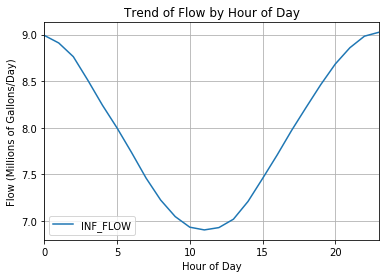

In [166]:
#This is interesting. Flow has an almost perfect cosine shaped trend over the course of an average day

hourly_flow_trend = df.groupby(['dt_hour_of_day'])['INF_FLOW'].mean()
hourly_flow_trend.plot(grid = True)
plt.xlabel('Hour of Day')
plt.title('Trend of Flow by Hour of Day')
plt.ylabel('Flow (Millions of Gallons/Day)')
plt.legend(labels = ['INF_FLOW'])
plt.show()

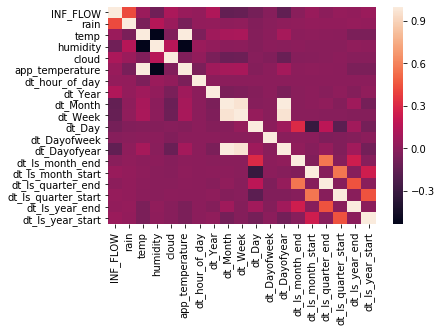

In [167]:
sn.heatmap(df.corr())
plt.show()

Apparent temperature has high correlation with correlation with temperature, as one would expect. Best to drop it in final model to avoid colinerarity.

### Model

I decided to use a Random Forest for a few reasons:
   1. Great at handling mixed data types
   2. Highly interpretable. The intuition behind decision trees/random forests is easy to understand (even more 
       than linear regression or especially something like a neural network)
   3. The .feature_importances() attribute makes it almost trivial to determine strongest predictors. The 
       magnitude of model cofficients in linear regression don't necessarily determine strength of prediciton.
       
Due to time constraints, I used Random Search Cross Validation rather than Grid Search for hyperparameter tuning. Given more time, I would use the latter with more parameters options for the absolute best results.

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
import pickle

In [169]:
data = df.drop(['Date_local', 'app_temperature'], axis = 1)

y = data['INF_FLOW']
X = data[data.columns[1:]]
                
#taking out the last 10% of our data for prediction
X_train, X_val = np.split(X, [int(.75*len(data))])
y_train, y_val = np.split(y, [int(.75*len(data))])     

In [170]:
#parameter grid for random search. Somewhat few values tried because of time restraints
random_grid = {'n_estimators' : [100,250,500],
       'max_depth' : [10, 50, 100],
       'max_features' : ['auto', 'sqrt'],
       'min_samples_leaf' : [1, 2 ,4],
       'min_samples_split' : [2, 5, 10],
        'bootstrap': [True],
        'oob_score' : [True]}

#base model
rf = RandomForestRegressor(random_state = 17)

#make time series splits for cross validation
tscv = TimeSeriesSplit(n_splits = 10).split(X_train)

rf_random_search = RandomizedSearchCV(estimator = rf, 
                                    param_distributions = random_grid,
                                      n_iter = 5,
                                      cv = tscv,
                                      random_state = 17,
                                      n_jobs = -1,
                                      verbose = 2)

In [171]:
rf_random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f810227c138>,
                   error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_est...
                                                   random_state=17, verbose=0,
   

In [172]:
#Show best 5 combinations of hyperparamters
results_ranked = pd.DataFrame(rf_random_search.cv_results_).sort_values(by = 'rank_test_score')
results_ranked[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_oob_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,9.971566,4.580541,0.116724,0.019101,True,500,2,4,sqrt,100,...,0.482143,0.490665,0.485903,0.280104,0.492880,0.544553,0.602965,0.469372,0.085709,1
0,21.176757,13.278422,0.076866,0.021601,True,250,5,4,auto,100,...,0.424353,0.388440,0.489693,0.375276,0.521225,0.545418,0.610511,0.447242,0.099060,2
1,8.944415,5.747134,0.036444,0.008705,True,100,5,4,auto,50,...,0.439020,0.376156,0.490023,0.377690,0.521541,0.541834,0.603683,0.444848,0.100454,3
3,15.259252,7.954652,0.054955,0.011066,True,250,10,2,auto,10,...,0.316614,0.335215,0.481567,0.392512,0.533837,0.530568,0.589181,0.418972,0.122423,4
2,10.440359,6.055413,0.042331,0.007226,True,100,5,2,auto,50,...,0.314378,0.271430,0.485097,0.389860,0.514940,0.536235,0.592043,0.403849,0.130288,5


In [174]:
rf_random_search.best_params_

{'oob_score': True,
 'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [175]:
#Manually create model with best parameters so we can get the OOB score
model = RandomForestRegressor(oob_score = True,
                            n_estimators = 500,
                            min_samples_split = 2, 
                            min_samples_leaf = 4, 
                            max_features = 'sqrt',
                            max_depth = 100,
                            bootstrap = True,
                            n_jobs = -1,
                            random_state = 17)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=17, verbose=0,
                      warm_start=False)

In [176]:
print('R^2 train data score: ', model.score(X_train, y_train))
print('R^2 validation data score: ', model.score(X_val, y_val))
print('OOB score: ', model.oob_score_)

R^2 train data score:  0.9010411893541934
R^2 validation data score:  0.6768602439608711
OOB score:  0.8276722751737419


The model is overfit. Definitely room for improvement if more time available.

In [177]:
sorted_feature_importances = sorted(zip(map(lambda x: round(x,4), model.feature_importances_), X.columns), reverse = True)
df_feature_importances = pd.DataFrame(sorted_feature_importances, columns = ['Feature Importance','Feature Name'])
df_feature_importances.set_index('Feature Name')

,Feature Importance
Feature Name,
gage_height,0.2304
discharge,0.1981
dt_hour_of_day,0.1349
rain,0.1047
temp,0.0617
humidity,0.0616
dt_Dayofyear,0.0533
dt_Week,0.0382
dt_Day,0.0352


As indicated in the prompt, gage_height is a very powerful predictor for flow. Also as illustrated, hour of day was a very strong predictor as well.

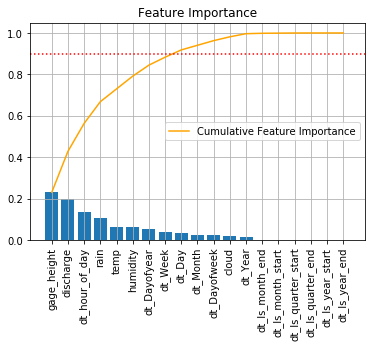

In [178]:
importances = model.feature_importances_
importances[::-1].sort()
indices = np.argsort(importances)[::-1]
cum_var = [importances[:x+1].sum() for x in range(len(importances))]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), df_feature_importances['Feature Name'], rotation=90)
plt.plot(cum_var, c = 'orange')
plt.axhline(0.9, c = 'red', linestyle = 'dotted')
plt.grid()
plt.legend(labels = ['Cumulative Feature Importance'], loc = 'center right')
plt.show()

The top 9 features capture 90% of the explained variability in the model. If the client desires a simpler model, the other models could easily be removed without losing too much predictive power.

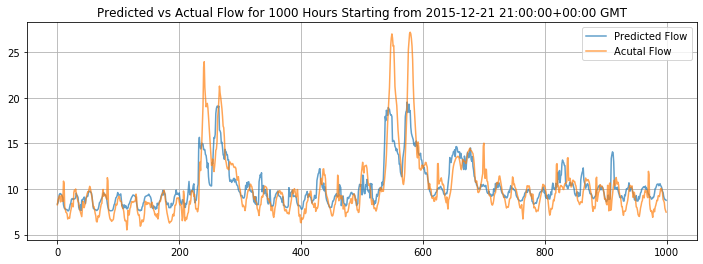

In [179]:
#Example predictions:
next_100_preds = model.predict(X_val[0:1000])
next_100_actual = y_val[0:1000]

plt.figure(figsize = (12,4))
for vals in [next_100_preds, next_100_actual]:
    plt.plot(range(len(vals)), vals, alpha = 0.7)
    
plt.legend(labels = ['Predicted Flow', 'Acutal Flow'])
plt.title('Predicted vs Actual Flow for 1000 Hours Starting from ' + str(y_val.index[0]) + ' GMT')
plt.grid()
plt.show()

The model predicts the general rise/fall trends well but could do much better in terms of capturing the magnitude of valleys and peaks 